In [1]:
import os
import pandas as pd

# 定义清理函数，用于清理 Excel 文件中的空格和无用列
def clear():
    # 遍历指定文件夹下的所有xlsx文件
    folder_path = './data_IR'  # 请替换为你的文件夹路径
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            file_path = os.path.join(folder_path, filename)
            # 使用pandas读取xlsx文件
            df = pd.read_excel(file_path)

            # 删除第一列字符串中的空格
            df[df.columns[0]] = df[df.columns[0]].apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
            
            # 删除第一行字符串中的空格
            df.columns = df.columns.to_series().apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

            # 创建一个新的DataFrame，它只包括第一列和那些不以 "Unnamed" 开头的列
            df = df[df.columns[0]].to_frame().join(df.loc[:, ~df.columns.str.startswith('Unnamed')])
            
            df.rename(columns={df.columns[0]: ''}, inplace=True)

            # 重新保存xlsx文件，这将自动将所有列的宽度设为单列
            df.to_excel(file_path, index=False)

# 定义转换函数，用于将多个 Excel 文件转换为一个 DataFrame，并将数据写入新的 Excel 文件
def trans():
    # 获取当前工作目录
    folder_path = os.path.join(os.getcwd(), 'data_IR')

    # 定义要写入的新Excel文件的路径
    output_path = os.path.join(os.getcwd(), 'output/resultIR.xlsx')

    # 定义要写入的DataFrame
    data = pd.DataFrame(columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Hectares', 'Active Substance'])

    data1 = []
    data2 = []

    # 遍历文件夹中的所有Excel文件
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            # 解析文件名以获取年份、作物类型和表类型
            parts = file_name.split('_')
            year = parts[-2]
            crop_type = '_'.join(parts[0:-2])
            table_type = parts[-1].split('.')[0]
            
            # 读取Excel文件
            df = pd.read_excel(os.path.join(folder_path, file_name), header=0, index_col=0)
            
            # 将数据转换为只有三列的DataFrame
            for fungicide in df.index:
                for crop in df.columns:
                    value = str(df.loc[fungicide, crop])

                    if isinstance(value, str):
                        value = value.replace(',', '').split(".")[0].replace('<', '0.')  # use 0.1 instead of <1
                        try:
                            value = float(value)
                        except ValueError:
                            value = 0.0
                    else:
                        print(value)
                        break

                    if pd.notna(value):
                        if table_type == 'ha':
                            #data1 = pd.concat([data, pd.DataFrame({'Year': year, 'Crop Type': crop_type, 'Crop': crop, 'Fungicide': fungicide, 'Hectares': value}, index=[0])], ignore_index=True)
                            data1.append([year, crop_type, crop, fungicide, value])
    
                        elif table_type == 'ac':
                            #data2 = pd.concat([data, pd.DataFrame({'Year': year, 'Crop Type': crop_type, 'Crop': crop, 'Fungicide': fungicide, 'Active Substance': value}, index=[0])], ignore_index=True)
                            data2.append([year, crop_type, crop, fungicide, value])
    
    # 将data1和data2转换为DataFrame对象
    df_data1 = pd.DataFrame(data1, columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Hectares'])
 
    
    df_data2 = pd.DataFrame(data2, columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Active Substance']) 
 
 
    # 使用inner方法合并df_data1和df_data2，并查找重复行
    df_data = pd.merge(df_data1, df_data2, how='inner', on=['Year', 'Crop Type', 'Crop', 'Fungicide'])
 
    # 将数据写入新的Excel文件
    df_data.to_excel(output_path, index=False)

# 调用清理函数和转换函数
clear()
trans()

OSError: Cannot save file into a non-existent directory: '/mnt/d/coding/codes/ML-all/IrelandFungicideDataAnalysis/output'

In [ ]:
import pandas as pd

df=pd.read_excel("output/resultIR.xlsx")

df.head()

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731.0,449.0
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0.0,0.0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946.0,353.0
3,2000,Arable_crops,Springwheat,Azoxystrobin,166.0,31.0
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861.0,621.0


In [ ]:


df.dropna(subset=['Fungicide'], inplace=True)
# 统计删除前的数据数量
print(f'删除前的数据数量：{len(df)}')


df.loc[df['Fungicide'].str.contains('other Fungicide', case=False), 'Fungicide'] = 'Other Fungicide'
df.loc[df['Fungicide'].str.contains('all Fungicide', case=False), 'Fungicide'] = 'all Fungicide'
df.loc[df['Fungicide'].str.contains('otherFungicide', case=False), 'Fungicide'] = 'Other Fungicide'
df.loc[df['Fungicide'].str.contains('allFungicide', case=False), 'Fungicide'] = 'all Fungicide'

df.loc[df['Fungicide'].str.contains('allFungicide', case=False), 'Fungicide'] = 'all Fungicide'
df.loc[df['Fungicide'].str.contains('allFungicide', case=False), 'Fungicide'] = 'all Fungicide'

# 删除Fugicide列中包含'all Fungicide'和'Other Fungicide'的行
df = df[~df['Fungicide'].str.contains('all Fungicide|Other Fungicide|allFungicide|OtherFungicide|all Fungicides|Other Fungicides|allFungicides|OtherFungicides', case=False)]

# 删除Crop列中包含'Allcrops'、'Totalquantity(kg)'和'Totalarea(spha)'的行
df = df[~df['Crop'].str.contains('Allcrops|Allcrops\\(spha\\)|Allcrops\\(kg\\)|Totalquantity\\(kg\\)|Totalarea\\(spha\\)|Totalquantity|Totalarea', case=False, regex=True)]
 
# 统计删除后的数据数量
print(f'删除后的数据数量：{len(df)}')

删除前的数据数量：14109
删除后的数据数量：12917


In [ ]:
df['Crop Type'].unique()

array(['Arable_crops', 'Arable_Crops', 'Edible_protected_crops',
       'Grassland_fodder_crops', 'Grassland_Fodder_crops',
       'Outdoor_vegetable_crops', 'Soft_fruit_crops', 'Soft_Fruit_Crops',
       'Top_fruit_crops', 'Top_Fruit_crops', 'Vegetable_crops'],
      dtype=object)

In [ ]:
# 将名称包含Arable的值重命名为Arable_crops
df.loc[df['Crop Type'].str.contains('Arable', case=False), 'Crop Type'] = 'Arable_crops'
df.loc[df['Crop Type'].str.contains('Grassland|Grassl', case=False), 'Crop Type'] = 'Grassland_fodder_crops'
df.loc[df['Crop Type'].str.contains('Protected', case=False), 'Crop Type'] = 'Protected_crops' 
df.loc[df['Crop Type'].str.contains('Soft', case=False), 'Crop Type'] = 'Soft_fruit'
df.loc[df['Crop Type'].str.contains('Top', case=False), 'Crop Type'] = 'Top_soft_fruit'
df.loc[df['Crop Type'].str.contains('vegetable', case=False), 'Crop Type'] = 'Outdoor_vegetable_crops'
df['Crop Type'].unique()

array(['Arable_crops', 'Protected_crops', 'Grassland_fodder_crops',
       'Outdoor_vegetable_crops', 'Soft_fruit', 'Top_soft_fruit'],
      dtype=object)

In [ ]:
# 按照不同的值，将data分成不同的数据集
data1=df[df["Crop Type"]=="Arable_crops"].to_excel("temp_data_IR/Arable_crops.xlsx") 
data2=df[df["Crop Type"]=="Protected_crops"].to_excel("temp_data_IR/Protected_crops.xlsx")
data3=df[df["Crop Type"]=="Grassland_fodder_crops"].to_excel("temp_data_IR/Grassland_fodder_crops.xlsx")
data4=df[df["Crop Type"]=="Outdoor_vegetable_crops"].to_excel("temp_data_IR/Outdoor_vegetable_crops.xlsx")   
data8=df[df["Crop Type"]=="Top_soft_fruit"].to_excel("temp_data_IR/Top_soft_fruit.xlsx")
data9=df[df["Crop Type"]=="Soft_fruit"].to_excel("temp_data_IR/Soft_fruit.xlsx") 

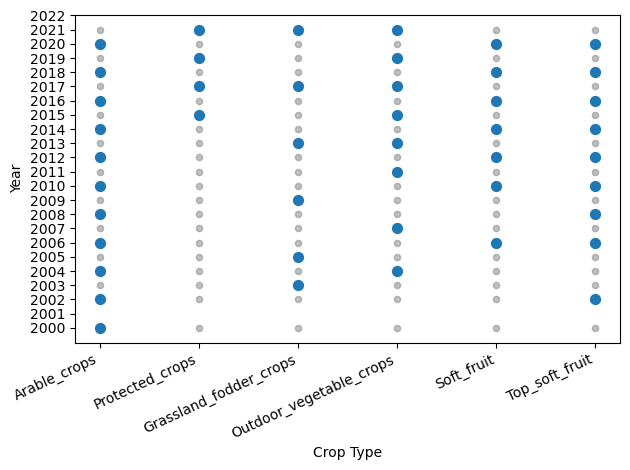

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
 

# 获取不重复的数据年份和 Crop Type 信息
years = df.iloc[:, 0].drop_duplicates().values
crop_types = df.iloc[:, 1].drop_duplicates().values

import matplotlib.pyplot as plt
 

# 存储结果
x = []
y = []
for year in years:
    for crop_type in crop_types:
        if not df[(df.iloc[:, 0] == year) & (df.iloc[:, 1] == crop_type)].empty:
            x.append(crop_type)
            y.append(year)

# 绘制散点图
all_combinations = [(crop_type, year) for crop_type in crop_types for year in years]
for combination in all_combinations:
    if combination not in zip(x, y):
        plt.scatter(combination[0], combination[1], color='gray', alpha=0.5, s=20)
plt.scatter(x, y, s=50)
plt.xlabel('Crop Type')
plt.ylabel('Year')
plt.yticks(range(2000, 2023))
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.savefig('output/Year_Crop Type.png', dpi=1000)
plt.show()

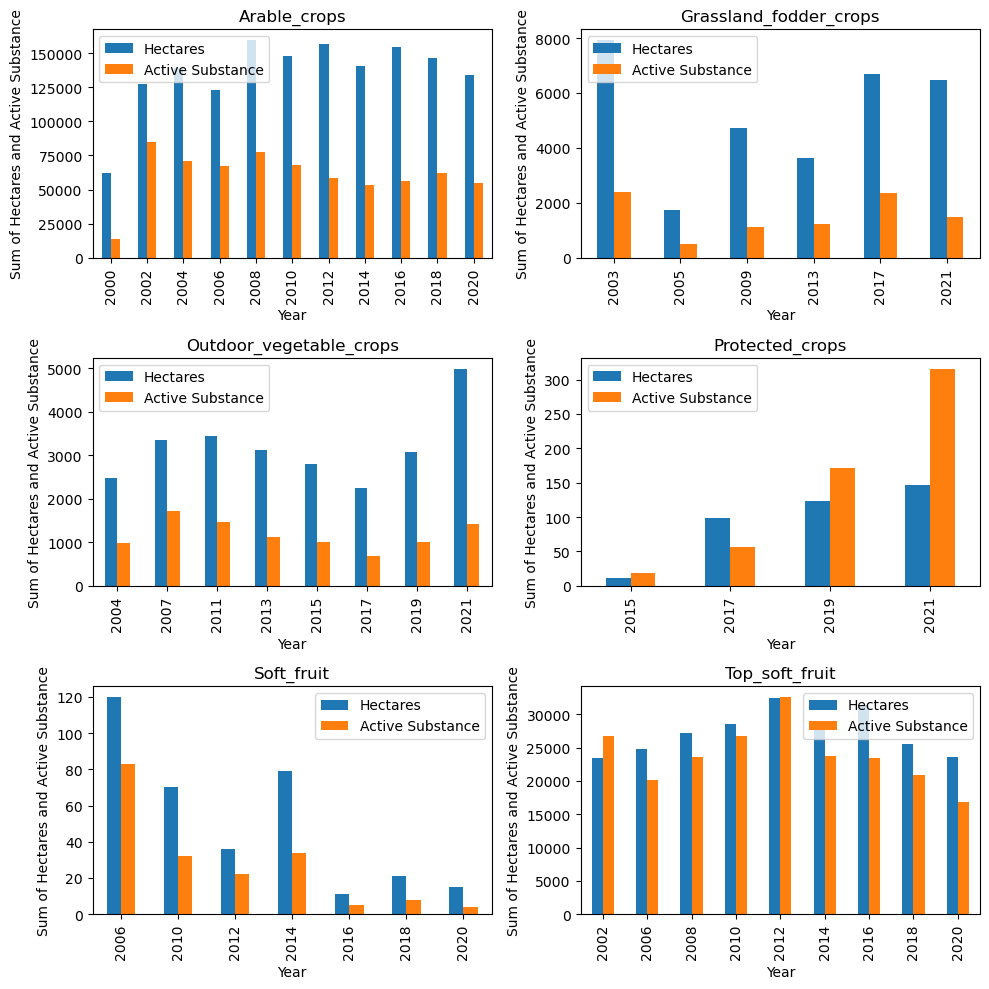

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
if not os.path.exists('IRoutput_plots'):
    os.makedirs('IRoutput_plots')

# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Read xlsx files from directory
for i, filename in enumerate(os.listdir('temp_data_IR')):
    if filename.endswith('.xlsx'):
        df = pd.read_excel(os.path.join('temp_data_IR', filename))

        # Group the data by 'Year', calculate the sum of 'Hectares' and 'Active Substance'
        grouped_data = df.groupby('Year').agg({'Hectares': 'sum', 'Active Substance': 'sum'})

        # Plot data on the i-th subplot
        row = i // 2
        col = i % 2
        ax = axs[row, col]
        grouped_data.plot(kind='bar', ax=ax)

        ax.set_xlabel('Year')
        ax.set_ylabel('Sum of Hectares and Active Substance')

        # Remove the file extension to use as the plot title
        plot_title = filename.rsplit('.', 1)[0]
        ax.set_title(plot_title)

        ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'subplot_IR.png')
plt.savefig(plot_filename,  dpi=1000)

plt.show()

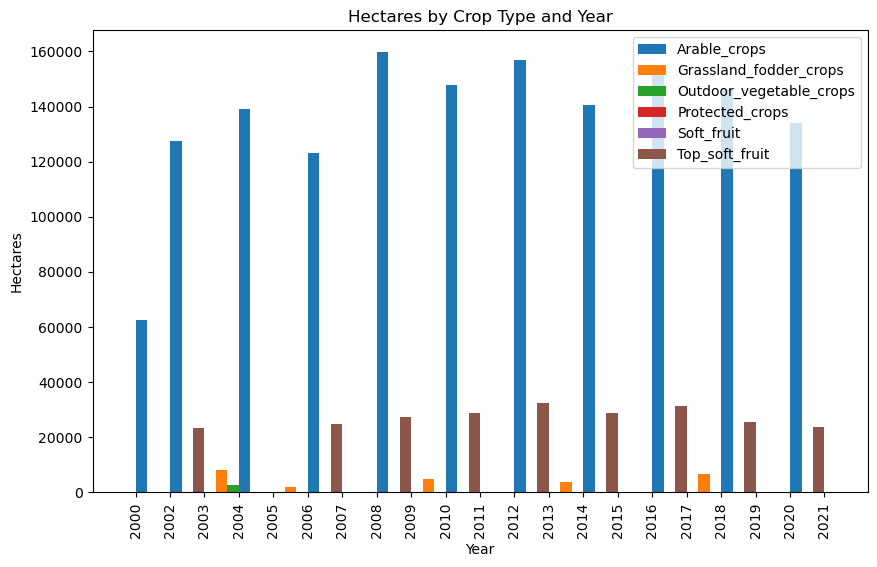

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
if not os.path.exists('IRoutput_plots'):
    os.makedirs('IRoutput_plots')

# Read xlsx files from directory
dfs = []
for filename in os.listdir('temp_data_IR'):
    if filename.endswith('.xlsx'):
        df = pd.read_excel(os.path.join('temp_data_IR', filename))
        dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs)

# Group the data by 'Year' and 'Crop Type', calculate the sum of 'Hectares' and 'Active Substance'
grouped_data = df.groupby(['Year', 'Crop Type']).agg({'Hectares': 'sum', 'Active Substance': 'sum'})

# Pivot the data to get Hectares for each year and crop type
pivoted_data = grouped_data.pivot_table(index='Year', columns='Crop Type', values='Hectares')
# Shift the first two columns one unit to the right
pivoted_data.iloc[:, 0:2] = pivoted_data.iloc[:, 0:2].shift(periods=1, axis=0)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot data on the axis object
pivoted_data.plot(kind='bar', ax=ax, width=2, color=colors)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Hectares')
ax.set_title('Hectares by Crop Type and Year')

# Add a legend to the plot
ax.legend()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'hectares_IR.png')
plt.savefig(plot_filename)

plt.show()

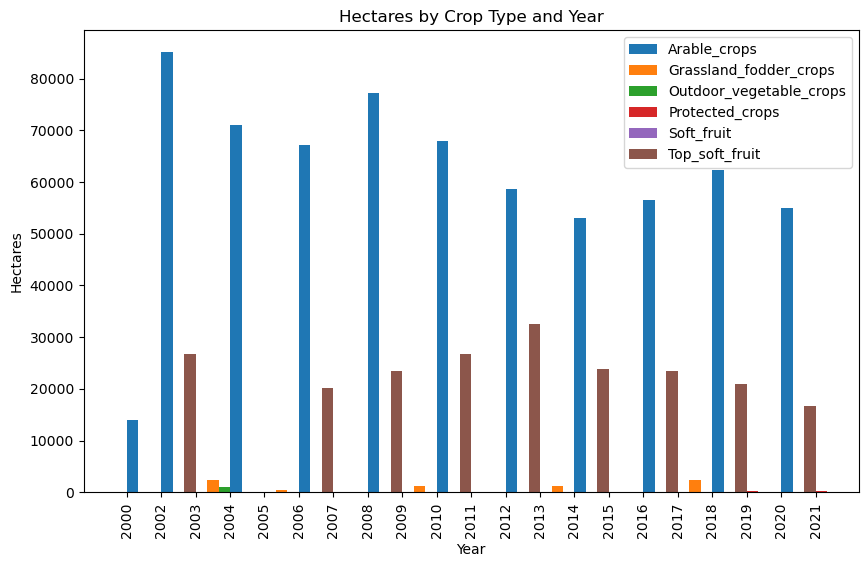

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
if not os.path.exists('IRoutput_plots'):
    os.makedirs('IRoutput_plots')

# Read xlsx files from directory
dfs = []
for filename in os.listdir('temp_data_IR'):
    if filename.endswith('.xlsx'):
        df = pd.read_excel(os.path.join('temp_data_IR', filename))
        dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs)

# Group the data by 'Year' and 'Crop Type', calculate the sum of 'Hectares' and 'Active Substance'
grouped_data = df.groupby(['Year', 'Crop Type']).agg({'Hectares': 'sum', 'Active Substance': 'sum'})

# Pivot the data to get Hectares for each year and crop type
pivoted_data = grouped_data.pivot_table(index='Year', columns='Crop Type', values='Active Substance')
# Shift the first two columns one unit to the right
pivoted_data.iloc[:, 0:2] = pivoted_data.iloc[:, 0:2].shift(periods=1, axis=0)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot data on the axis object
pivoted_data.plot(kind='bar', ax=ax, width=2, color=colors)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Hectares')
ax.set_title('Hectares by Crop Type and Year')

# Add a legend to the plot
ax.legend()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'Active Substance_IR.png')
plt.savefig(plot_filename)

plt.show()



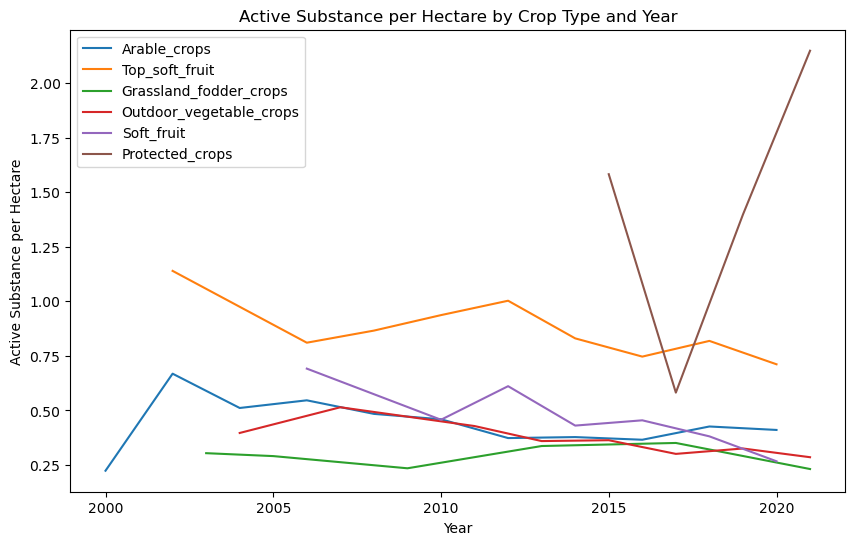

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
if not os.path.exists('IRoutput_plots'):
    os.makedirs('IRoutput_plots')

# Read xlsx files from directory
dfs = []
for filename in os.listdir('temp_data_IR'):
    if filename.endswith('.xlsx'):
        df = pd.read_excel(os.path.join('temp_data_IR', filename))
        dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs)

# Group the data by 'Year' and 'Crop Type', calculate the sum of 'Active Substance' and 'Hectares'
grouped_data = df.groupby(['Year', 'Crop Type']).agg({'Hectares': 'sum', 'Active Substance': 'sum'})

# Calculate Active Substance per Hectare
grouped_data['Active Substance per Hectare'] = grouped_data['Active Substance'] / grouped_data['Hectares']

# Reset the index of the dataframe
grouped_data = grouped_data.reset_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn to plot the data
sns.lineplot(data=grouped_data, x='Year', y='Active Substance per Hectare', hue='Crop Type', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Active Substance per Hectare')
ax.set_title('Active Substance per Hectare by Crop Type and Year')

# Add a legend to the plot
ax.legend()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'active_substance_per_hectare_IR.png')
plt.savefig(plot_filename)

plt.show()

Fungicide
*Sulphur                     2002
Ametoctradin/Dimethomorph    2012
Ametoctradin/dimethomorph    2016
Amisulbrom                   2020
Azoxystrobin                 2000
                             ... 
Tridemorph                   2000
Trifloxystrobin              2000
Unknownfungicide             2002
Vinclozolin                  2002
Zineb                        2004
Name: Year, Length: 216, dtype: int64
Fungicide
*Sulphur                     2002
Ametoctradin/Dimethomorph    2014
Ametoctradin/dimethomorph    2020
Amisulbrom                   2020
Azoxystrobin                 2021
                             ... 
Tridemorph                   2002
Trifloxystrobin              2020
Unknownfungicide             2021
Vinclozolin                  2002
Zineb                        2004
Name: Year, Length: 216, dtype: int64
                           First Year  Last Year  Year Range
Fungicide                                                   
*Sulphur                         2

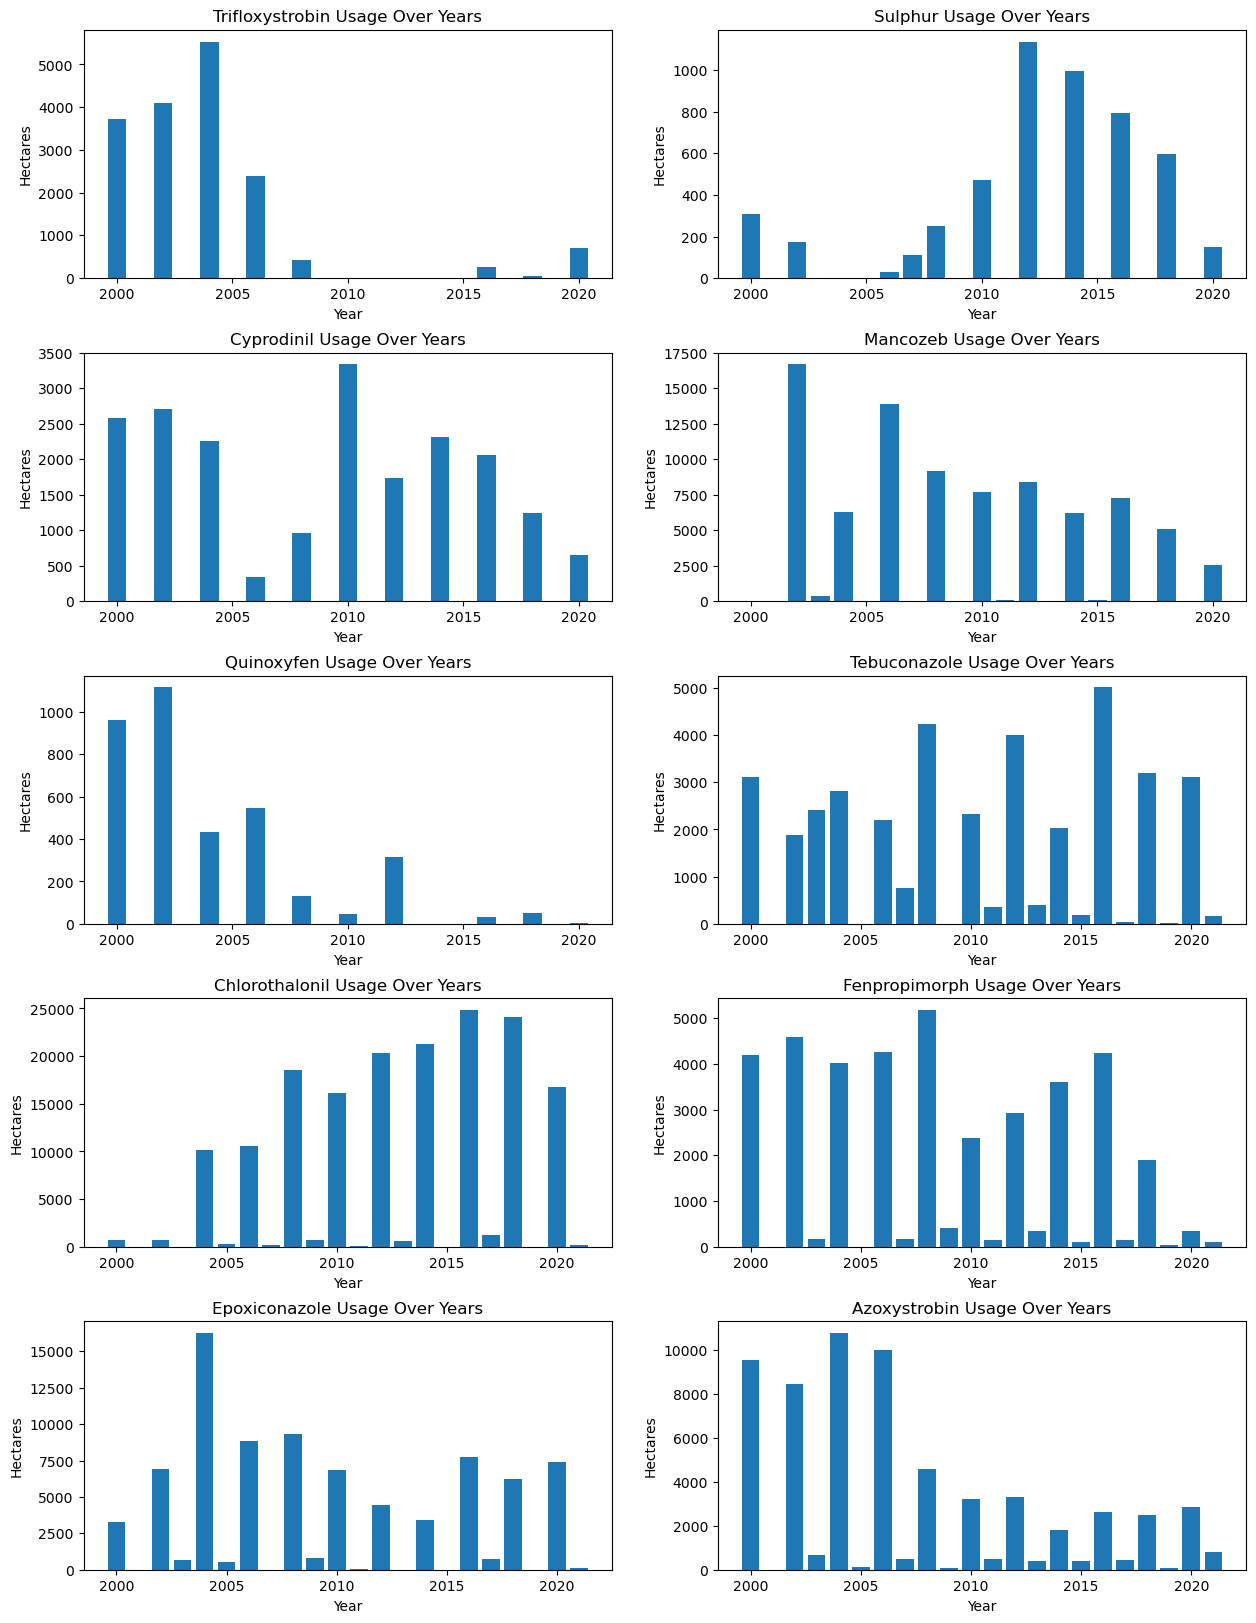

In [ ]:
# 统计每个Fungicide值第一次出现的年份
print(df.groupby("Fungicide")["Year"].min())

# 统计每个Fungicide值最后一次出现的年份
print(df.groupby("Fungicide")["Year"].max())

# 将结果保存到csv文件中
min_year = df.groupby("Fungicide")["Year"].min()
max_year = df.groupby("Fungicide")["Year"].max()
result = pd.concat([min_year, max_year], axis=1)
result.columns = ["First Year", "Last Year"]
result.to_excel("temp_data/year_range.xlsx")

# 按照杀菌剂使用的时间长短（last year - first year），进行排序
result["Year Range"] = result["Last Year"] - result["First Year"]
result.sort_values(by="Year Range", inplace=True)
print(result)
result.to_excel("temp_data/year_range.xlsx")

top_10 = result.tail(10)
top_10_fungicides = top_10.index.tolist()
print(top_10_fungicides)

# 从df中提取出top_10_fungicides的数据
top_10_df = df[df["Fungicide"].isin(top_10_fungicides)] 

# 按照Fungicide和Year进行分组，计算Hectares的和
top_10_df = top_10_df.groupby(["Fungicide", "Year"]).agg({"Hectares": "sum"}) 

# 将top_10_df中的Fungicide和Year转换为列
top_10_df.reset_index(inplace=True) 

# 将top_10_df中的Fungicide的值作为列名，Hectares的值作为对应的值
top_10_df = top_10_df.pivot(index="Year", columns="Fungicide", values="Hectares")
print(top_10_df)

# Create a figure and axis object
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)

# Loop through the top 10 fungicides and plot each one on a separate axis
for i, fungicide in enumerate(top_10_fungicides):
    # Calculate the row and column index for the current axis
    row = i // 2
    col = i % 2

    # Extract the data for the current fungicide
    fungicide_df = top_10_df[fungicide]

    # Plot the data on the current axis
    axs[row, col].bar(fungicide_df.index, fungicide_df.values)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Hectares')
    axs[row, col].set_title(f'{fungicide} Usage Over Years')
    axs[row, col].tick_params(axis='x')

    # Save the plot to a file
    plot_filename = os.path.join('output_images', 'top10.png')
    plt.savefig(plot_filename, dpi=1000)

# Show the plot
plt.show()

Arable_crops.xlsx Year
2000    42
2002    56
2004    51
2006    55
2008    60
2010    59
2012    67
2014    63
2016    67
2018    64
2020    68
Name: Fungicide, dtype: int64
Grassland_fodder_crops.xlsx Year
2003    12
2005     7
2009    16
2013    19
2017    22
2021    22
Name: Fungicide, dtype: int64
Outdoor_vegetable_crops.xlsx Year
2004    22
2007    19
2011    22
2013    24
2015    21
2017    18
2019    16
2021    14
Name: Fungicide, dtype: int64
Protected_crops.xlsx Year
2015     7
2017    12
2019    14
2021    11
Name: Fungicide, dtype: int64
Soft_fruit.xlsx Year
2006    19
2010    18
2012    21
2014    21
2016    11
2018    14
2020    11
Name: Fungicide, dtype: int64
Top_soft_fruit.xlsx Year
2002    19
2006    16
2008    20
2010    19
2012    18
2014    17
2016    19
2018    23
2020    23
Name: Fungicide, dtype: int64


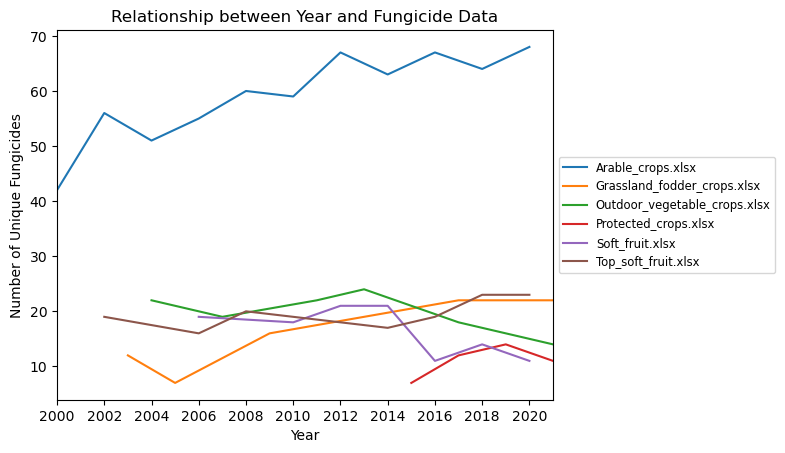

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的DataFrame 
df = pd.DataFrame()

# 循环读取temp_data目录下的所有xlsx文件
for filename in os.listdir('temp_data_IR'):
    if filename.endswith('.xlsx'):
        # 读取文件
        data = pd.read_excel(os.path.join('temp_data_IR', filename))

        # 将年份转换为整数类型
        data['Year'] = data['Year'].astype(int)

        # 计算每年使用的杀菌剂的种类数量
        data = data.groupby('Year')['Fungicide'].nunique()
        print(filename, data)
        # Create a line plot
        data.plot(kind='line', label=filename)

plt.xlabel('Year')
plt.ylabel('Number of Unique Fungicides')
plt.title('Relationship between Year and Fungicide Data')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
# Set x-axis limits
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
plt.savefig('output_plots/relationship_between_year_and_fungicide_data.png', dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
df = pd.read_excel("D:\\coding\\codes\\proj2\\temp_data_IR\\Arable_crops.xlsx")

# 按年份分组，计算Hectares和Active Substance的总和
grouped_data = df.groupby('Year').agg({'Hectares': 'sum', 'Active Substance': 'sum'})

# 使用时间序列模型判断Hectares的值是否存在趋势
model = ARIMA(grouped_data['Hectares'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# 使用时间序列模型判断Active Substance的值是否存在趋势
model = ARIMA(grouped_data['Active Substance'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Hectares   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -81.920
Date:                Wed, 12 Jul 2023   AIC                            169.839
Time:                        17:57:56   BIC                            169.677
Sample:                             0   HQIC                           167.834
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8916      0.758     -1.176      0.240      -2.378       0.594
ma.L1          0.9974      1.274      0.783      0.434      -1.500       3.495
sigma2      8.196e+08   1.68e-09   4.89e+17      0.0

d:\Anaconda\envs\pytorch20.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\envs\pytorch20.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\envs\pytorch20.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\envs\pytorch20.1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Anaconda\envs\pytorch20.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided a

In [ ]:
import pandas as pd
import scipy.stats as stats
df=pd.read_excel("output/resultIR.xlsx")

# 假设 df 是一个 DataFrame，其中 "Crop Type" 是作物类型， "Hectares" 是每公顷的杀菌剂使用量
# 使用 pandas 的 groupby 方法，根据作物类型将数据分组
groups = df.groupby("Crop Type").groups
unique_crop_types = df["Crop Type"].unique()
 

# 将每一组作物的杀菌剂使用量收集起来
hectares_used = [df.loc[groups[name], "Hectares"] for name in groups]

# 进行 ANOVA 分析
f_value, p_value = stats.f_oneway(*hectares_used)

print("F-value:", f_value)
print("P-value:", p_value)


Unique crop types: ['Arable_crops' 'Arable_Crops' 'Edible_protected_crops'
 'Grassland & fodder_crops' 'Grassland & Fodder_Crops'
 'Outdoor_vegetable_crops' 'Soft_fruit_crops' 'Soft_Fruit_Crops'
 'Top_fruit_crops' 'Top_Fruit_Crops' 'Vegetable_crops']
F-value: 4.588524099593207
P-value: 1.5546409090580323e-06


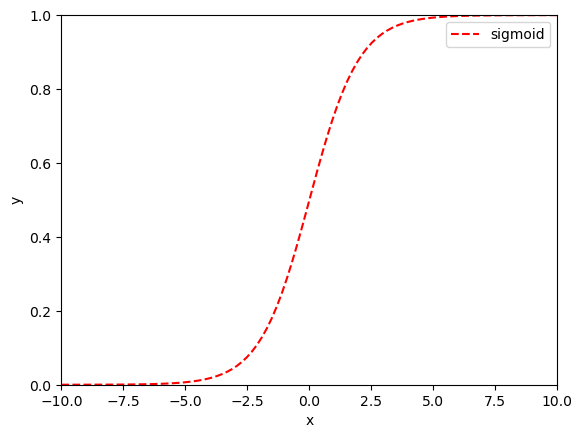

In [ ]:
# 画一个神经网络模型
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 读取数据
